<a href="https://colab.research.google.com/github/sleeptiger/Portfolio/blob/main/Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

from datetime import datetime
from datetime import datetime, timedelta
import datetime
from dateutil.relativedelta import relativedelta


In [4]:
import yfinance as yf

In [5]:
# 달러 금일 
dol_url = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%8B%AC%EB%9F%AC')
dol_url.raise_for_status() # == 응답코드 200 정상 

soup = BeautifulSoup(dol_url.text, 'lxml')
dol = soup.find('span', attrs={"class" : "spt_con dw"}) # find 함수 span element 중에 class 속성이 spt_con dw 것을 찾아줘

dollar = dol.strong.get_text()

print(dollar)

1,232.20


In [6]:
dt_now = datetime.datetime.now()
one_month_day = dt_now - relativedelta(months=1)

In [13]:
len(list)

4

In [111]:
# 컬러명 리스트
list = ['google', 'apple', 'tesla', 'jones&jones','NVIDIA','Nokia Oyj']
list_code = ['GOOG', 'AAPL', 'TSLA','JNJ','NVDA','NOK' ]
# 날짜 설정
years = '2023-01-20'

# 오늘 기준 한달 (default)
dt_now = datetime.datetime.now()
one_month_day = dt_now - relativedelta(months=1) 

# 기본_value
am_stock = yf.download(list_code[0], start = one_month_day)
am_stock = am_stock.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

datas = list_code[1:]
for data in datas:
    db = yf.download(data, start = one_month_day)
    db = db.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
    am_stock = pd.merge(am_stock, db, how='outer', on='Date')
    print('입력되었습니다.')
# 컬럼명 지정
am_stock.columns = list
# 인덱스_value 부여
am_stock = am_stock.reset_index()
# 날짜 변경
am_stock['Date'] = am_stock['Date'].dt.date

am_stock.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
입력되었습니다.
[*********************100%***********************]  1 of 1 completed
입력되었습니다.
[*********************100%***********************]  1 of 1 completed
입력되었습니다.


<ipython-input-111-bfe54c4c5c2d>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  am_stock = pd.merge(am_stock, db, how='outer', on='Date')


[*********************100%***********************]  1 of 1 completed
입력되었습니다.
[*********************100%***********************]  1 of 1 completed
입력되었습니다.


<ipython-input-111-bfe54c4c5c2d>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  am_stock = pd.merge(am_stock, db, how='outer', on='Date')


,Date,google,apple,tesla,jones&jones,NVIDIA,Nokia Oyj
0,2022-12-27,87.930000,130.029999,109.099998,177.429993,141.210007,4.62
1,2022-12-28,86.459999,126.040001,112.709999,176.660004,140.360001,4.56
2,2022-12-29,88.949997,129.610001,121.820000,177.559998,146.029999,4.68
3,2022-12-30,88.730003,129.929993,123.180000,176.649994,146.139999,4.64
4,2023-01-03,89.699997,125.070000,108.099998,178.190002,143.149994,4.69


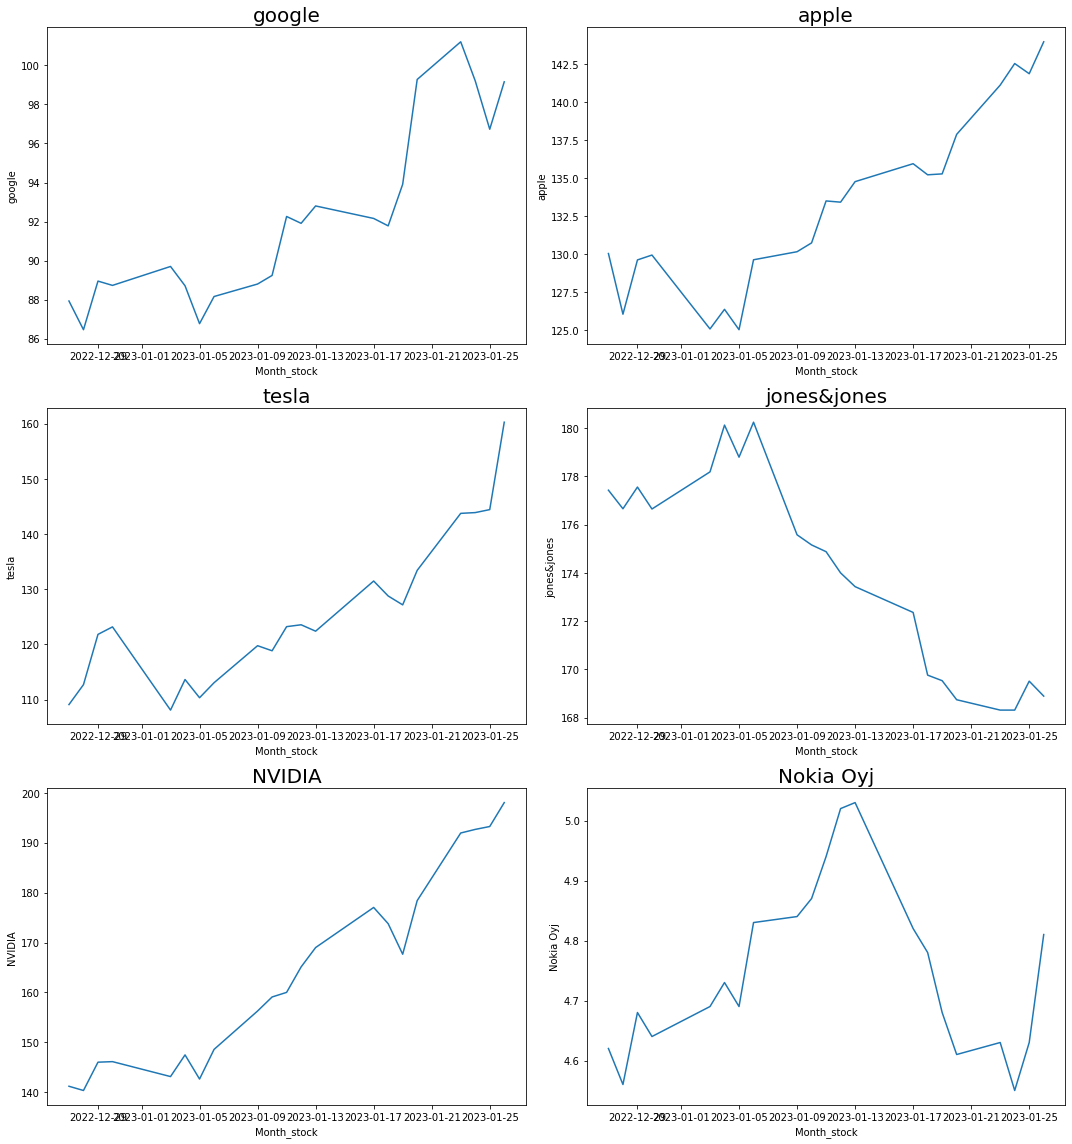

In [118]:
num = len(list) # 4 
num_st = (num // 2) # 2 
col_num = num_st -1
am_stock_date = am_stock.columns[0] # Date

fig, axex = plt.subplots(nrows=num_st, ncols=col_num, figsize=(15,16))
    
for row in range(num_st): # 0,1,
    for col in range(col_num): # 0,1,2
        idx = row * col_num + col # change_values ... 
        
        if idx < len(list): 
            ax = axex[row][col]
            sns.lineplot(x =am_stock[am_stock_date], y =am_stock[am_stock.columns[idx+1]], ax=ax)
            ax.set_title(list[idx], fontsize=20)
            ax.set_xlabel('Month_stock')
            
            
fig.tight_layout()
plt.show()
        

In [9]:
# # 코드 폼
# plt.figure(figsize=(20, 5))
# plt.plot(am_stock['Date'], am_stock['종목'], label='종목이름')
# plt.title('종목명_stock_graph', fontsize=20)
# plt.legend()
# plt.show()

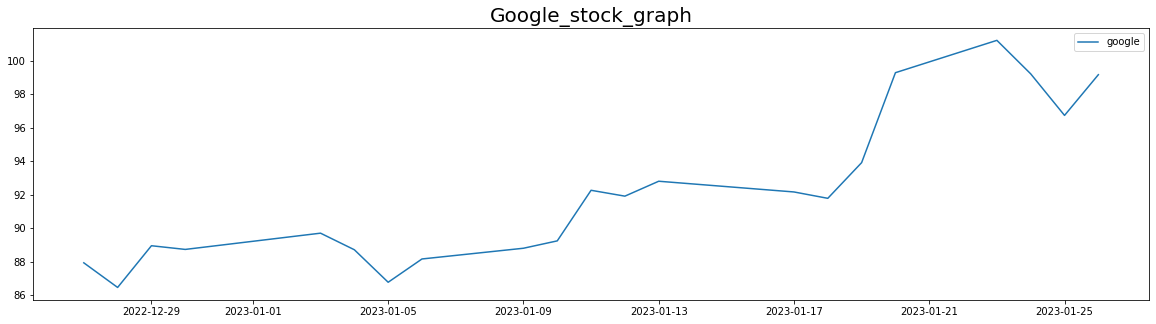

In [86]:
plt.figure(figsize=(20, 5))
plt.plot(am_stock['Date'], am_stock['google'], label=list[0])
plt.title('Google_stock_graph', fontsize=20)
plt.legend()
plt.show()